<a href="https://colab.research.google.com/github/arshpreet10/Internity-Winter-Internship/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('advertising.csv')

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
X = df.iloc[:,0:3]
y = df.iloc[:,3]

In [ ]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
norm_X = normalize(X)

In [ ]:
X.shape[1]

3

In [ ]:
X = np.append(np.ones([len(X),1]), X, axis=1) 

In [ ]:
theta = np.random.rand(X.shape[1])

In [ ]:
theta

array([0.84056644, 0.68772954, 0.95737752, 0.45353313])

In [ ]:
theta.T.shape

(4,)

In [ ]:
def cost(X, y, theta):
  m = len(X)
  h =  np.dot(X,theta)
  J = 1/(2*m)*np.sum((h-y)**2)
  return J

In [ ]:
cost(X,y,theta)

9271.592751751181

In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):
    costs = []
    m = len(X)
    for i in range(iterations):
        h = np.dot(X,theta)
        theta = theta - (alpha/m)*np.dot(X.T,h-y)
        curr_cost = cost(X, y, theta)
        costs.append(curr_cost)  
    return theta, costs

In [ ]:
def plot_cost_curve(costs):
  plt.plot(costs)
  plt.ylabel('Cost')
  plt.xlabel('No. of Iterations')
  plt.title('Gradient Descent')

In [ ]:
final_theta, c= gradient_descent(X,y,theta,0.001,100)

In [ ]:
c

[7720062.32060798,
 6555022919.638385,
 5565817088855.598,
 4725890405466670.0,
 4.012715432067582e+18,
 3.407164313443981e+21,
 2.892995741994264e+24,
 2.456419354409439e+27,
 2.0857258644140963e+30,
 1.770973011459519e+33,
 1.5037189022916154e+36,
 1.276795593426685e+39,
 1.0841168418574919e+42,
 9.205148677281602e+44,
 7.816017508378279e+47,
 6.636517435296492e+50,
 5.635013435139136e+53,
 4.784644465080048e+56,
 4.062603030272255e+59,
 3.4495234707687267e+62,
 2.9289625608798174e+65,
 2.4869584902762996e+68,
 2.111656398400497e+71,
 1.7929904187545784e+74,
 1.5224137052698662e+77,
 1.2926691998741634e+80,
 1.0975949930817959e+83,
 9.319590572402452e+85,
 7.913189198626381e+88,
 6.71902513386005e+91,
 5.705070056618846e+94,
 4.844128977417651e+97,
 4.113110849994442e+100,
 3.492409253182316e+103,
 2.9653765328814184e+106,
 2.5178773002479993e+109,
 2.137909310607495e+112,
 1.8152815547969806e+115,
 1.5413409291200415e+118,
 1.3087401530096702e+121,
 1.1112407097874323e+124,
 9.43545

In [ ]:
final_theta

array([1.09659674e+144, 2.13344517e+146, 2.63267782e+145, 3.48973913e+145])

In [ ]:
final_cost = cost(X,y,final_theta) 

In [ ]:
final_cost

7.147207575614815e+296

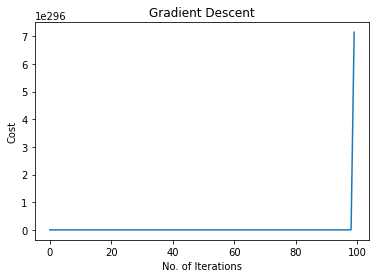

In [ ]:
plot_cost_curve(c)

In [ ]:
final_theta, c= gradient_descent(X,y,theta,0.00001,100)

In [ ]:
final_theta

array([ 0.83316837, -0.00253752,  0.62963798,  0.07357837])

In [ ]:
final_cost = cost(X,y,final_theta) 

In [ ]:
final_cost

48.807852030789455

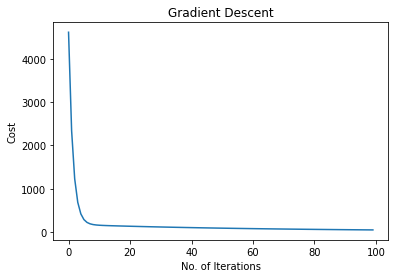

In [ ]:
plot_cost_curve(c)

In [ ]:
final_theta, c= gradient_descent(X,y,theta,0.000001,100)

In [ ]:
final_theta

array([ 0.83634987, -0.02778328,  0.83757041,  0.29817306])

In [ ]:
final_cost = cost(X,y,final_theta) 

In [ ]:
final_cost

175.82742944639634

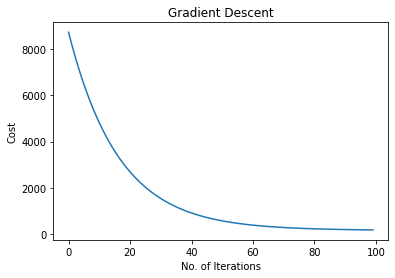

In [ ]:
plot_cost_curve(c)

In [ ]:
pred = np.dot(X,final_theta)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y,pred)

-11.658598802928244

In [ ]:
def evaluate(X, y, theta, alpha, iterations):
  final_theta, c= gradient_descent(X,y,theta,alpha,iterations)
  print("Final Cost:", cost(X,y,final_theta))
  plot_cost_curve(c)
  pred = np.dot(X,final_theta)
  print("R2 Score", r2_score(y,pred))

##Testing with different values of alpha and no. of iterations

Final Cost: 5.84831441842234e+64
R2 Score -4.210461708351292e+63


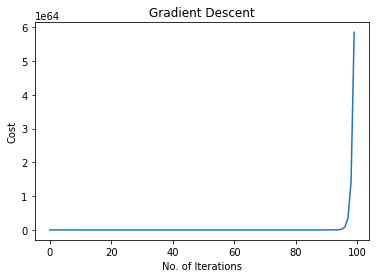

In [ ]:
evaluate(X,y,theta,0.0001,100)

Final Cost: 48.807852030789455
R2 Score -2.513894386306818


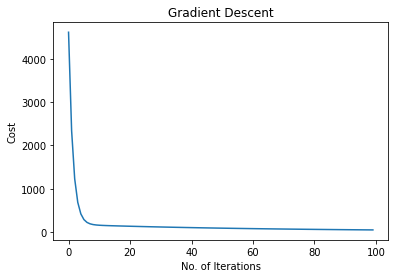

In [ ]:
evaluate(X,y,theta,0.00001,100)

Final Cost: 175.82742944639634
R2 Score -11.658598802928244


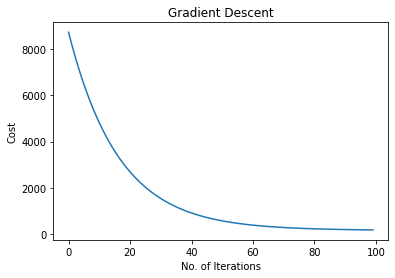

In [ ]:
evaluate(X,y,theta,0.000001,100)

Final Cost: 18.98608291530283
R2 Score -0.3668925674490353


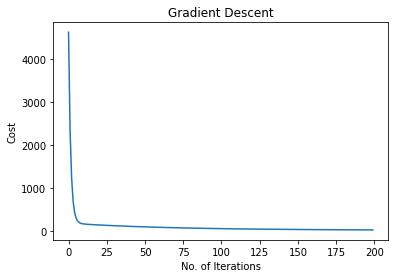

In [ ]:
evaluate(X,y,theta,0.00001,200)

Final Cost: 2.895250529840861
R2 Score 0.7915580350198196


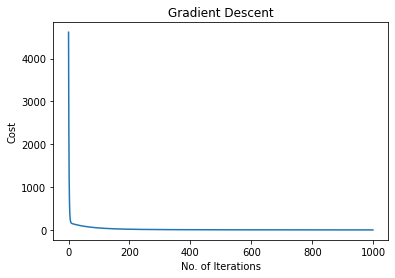

In [ ]:
evaluate(X,y,theta,0.00001,1000)